In [1]:
import spacy
import pandas as pd
import spacy
import tqdm
from tqdm import tqdm
import numpy as np

In [18]:
df = pd.read_csv('data/cleaned_merged.csv')
df.head()

,index,user_id,business_id,stars,text,state,rating,categories,star_categories,tokens
0,5187187,Dym1vn-YOcQAcR-cJOGMFg,EKnbQlntPX0FsgAC94XniA,3.0,Very bad service to start with. Came with grou...,ON,3.0,"Chinese, Noodles, Restaurants",Bad,"['bad', 'service', 'start', 'come', 'group', '..."
1,1831372,Ybs6-fKCp2pwsfSevZ5cKg,MLQeuiL9rqOq_rDKGEcU0A,2.0,"So-so. Meals were OK, dry martini wasn't, and ...",ON,3.5,"Restaurants, Pizza, Italian",Bad,"['meal', 'ok', 'dry', 'martini', 'wasn', 'fini..."
2,4564496,kgcaYt5PFkdzznmdV3VNXw,4MLQG9gKglkALP0EnsEMeA,4.0,Good food. Reasonably priced. The royal pad Th...,ON,3.5,"Restaurants, Thai",Good,"['good', 'food', 'reasonably', 'price', 'royal..."
3,2980901,3odcL7qzm2EwEh4Y9aFcdg,KVpvE6pOPM9KMvak4HFsNg,1.0,The pizzas here are really nothing special. I ...,ON,4.0,"Restaurants, Italian, Pizza",Bad,"['pizza', 'special', 'don', 'understand', 'hyp..."
4,5137087,blzoo8N0xhXbThjRBMbEqQ,BTxJv_Ad8bCxYfbC6w3ugA,5.0,"I got a tafu sandwich, at first was skeptical ...",ON,4.0,"Vietnamese, Restaurants, Sandwiches",Excellent,"['get', 'tafu', 'sandwich', 'skeptical', 'plac..."


In [20]:
categories = ['Chinese']
df = df[df['categories'].str.contains('|'.join(categories))]
df.shape

(1413, 10)

In [21]:
df.shape

(1413, 10)

In [22]:
df['star_categories'].value_counts()

Bad          666
Good         455
Excellent    292
Name: star_categories, dtype: int64

In [23]:
df.nunique()

index              1413
user_id            1244
business_id         646
stars                 5
text               1413
state                 1
rating                9
categories          381
star_categories       3
tokens             1412
dtype: int64

In [33]:
df.head()

,index,user_id,business_id,stars,text,state,rating,categories,star_categories,tokens
0,5187187,Dym1vn-YOcQAcR-cJOGMFg,EKnbQlntPX0FsgAC94XniA,3.0,Very bad service to start with. Came with grou...,ON,3.0,"Chinese, Noodles, Restaurants",Bad,"['bad', 'service', 'start', 'come', 'group', '..."
14,2562374,CSxe7cFEyfTClJolLYqhUA,awZx3Y1PAwhCUpt3WGZhKg,5.0,My wife and I spent $46 dollar tonight. We got...,ON,3.5,"Fast Food, Chinese, Restaurants",Excellent,"['wife', 'spend', 'dollar', 'tonight', 'get', ..."
20,2427815,xxBo7hc6jysb_sDpRhYUSA,oRgoOhwCex1X9j1iQ9ou3w,4.0,Love to come to this place for early dim sum.....,ON,3.5,"Chinese, Restaurants, Dim Sum",Good,"['love', 'come', 'place', 'early', 'dim', 'sum..."
25,3828681,n3z1iSEGynVgMK_nHmzryA,XXGzCIcxzAZ6H98mxZbdqA,4.0,"Culture shock activate! No really, did I visit...",ON,3.5,"Chinese, Imported Food, Food, Grocery, Interna...",Good,"['culture', 'shock', 'activate', 'visit', 'tor..."
50,313087,u7_dW0szdkiqTfliiF9_JQ,AbgNPAnuq8X90DUw5FQ2sQ,4.0,Came here for a Sunday dim sum lunch with my f...,ON,3.0,"Chinese, Restaurants",Good,"['come', 'sunday', 'dim', 'sum', 'lunch', 'fam..."


### Split Train/Test

In [24]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size=0.33, random_state=42)

feature = 'tokens'
target = 'star_categories'

#Train
X_train = train[feature]
y_train = train[target]

# Validation Sets
X_test = test[feature]
y_test = test[target]

In [25]:
y_train.value_counts()

Bad          443
Good         295
Excellent    208
Name: star_categories, dtype: int64

In [26]:
y_test.value_counts()

Bad          223
Good         160
Excellent     84
Name: star_categories, dtype: int64

### Spacy Word Embedding

In [27]:
nlp = spacy.load('en_core_web_lg')

In [28]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in tqdm(docs)]

X_train = get_word_vectors(X_train)

100%|██████████| 946/946 [00:31<00:00, 29.76it/s]


In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

1.0

In [30]:
X_test= get_word_vectors(X_test)

100%|██████████| 467/467 [00:15<00:00, 29.63it/s]


In [31]:
y_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.64      0.83      0.73       223
   Excellent       0.34      0.27      0.30        84
        Good       0.46      0.32      0.38       160

    accuracy                           0.56       467
   macro avg       0.48      0.48      0.47       467
weighted avg       0.53      0.56      0.53       467



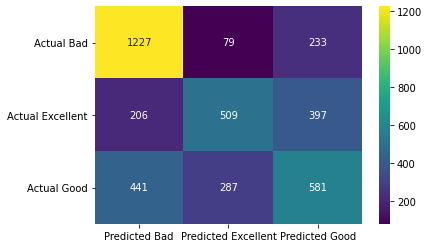

In [17]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_test, y_pred);

### Word Embeddings Using Glove

In [44]:
from zeugma.embeddings import EmbeddingTransformer
from sklearn.ensemble import RandomForestClassifier

glove = EmbeddingTransformer('glove')
X_train = glove.transform(list(X_train))

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
model.score(X_train, y_train)

0.39440298507462684

In [47]:
X_test = glove.transform(list(X_test))
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.39      1.00      0.56      1539
   Excellent       0.00      0.00      0.00      1112
        Good       0.00      0.00      0.00      1309

    accuracy                           0.39      3960
   macro avg       0.13      0.33      0.19      3960
weighted avg       0.15      0.39      0.22      3960



/Users/ashleyadrias/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


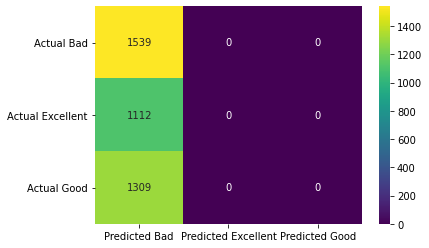

In [49]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_test, y_pred);